# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [6]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [12]:
# Your code to explore data and train a regression model

### Exploratory Data Analysis
> Checking if there is any missing value

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [11]:
data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

### Stastical Analysis
> Quantitative Analysis

In [14]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [104]:
predictive_features = ['house_age','transit_distance','local_convenience_stores','latitude','longitude']
label = 'price_per_unit'
data[predictive_features + ['price_per_unit']].describe()

,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Visualization Functions for Iterative Usage

In [83]:
import matplotlib.pyplot as plt
import numpy as np

def show_distribution(column_data):
    # Get statistics
    min_val = column_data.min()
    max_val = column_data.max()
    mean_val = column_data.mean()
    med_val = column_data.median()
    mod_val = column_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))
    
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2,1,figsize=(12,6))

    # Plot the histogram   
    ax[0].hist(column_data)
    ax[0].set_ylabel("Frequency")

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'green', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'orange', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(column_data, vert=False)
    ax[1].set_xlabel("Value")

    # Add a title to the Figure
    fig.suptitle("DATA DISTRIBUTION")

    # Show the figure
    fig.show()
 
def show_density(column_data): 
    # Get statistics
    min_val = column_data.min()
    max_val = column_data.max()
    mean_val = column_data.mean()
    
    fig = plt.figure(figsize=(12,6))
    column_data.plot.density()
    
    plt.axvline(x=min_val, color = 'green', linestyle='dashed', linewidth = 2)
    plt.axvline(x=max_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    plt.axvline(x=mean_val, color = 'red', linestyle='dashed', linewidth = 2)
    
    plt.show()


Minimum:7.60
Mean:37.98
Median:38.45
Mode:24.70
Maximum:117.50



<ipython-input-40-d49e57036df6>:40: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


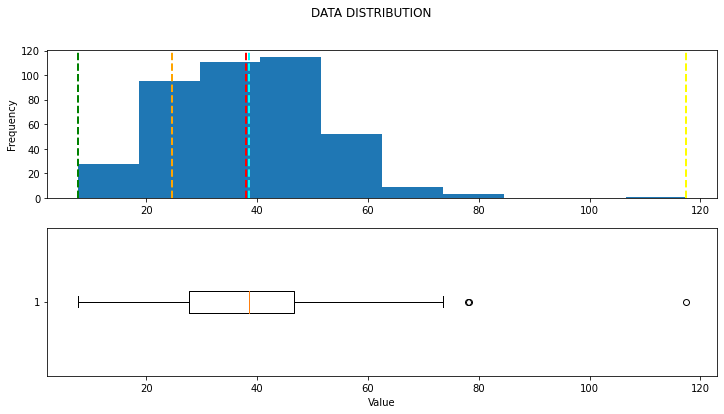

In [43]:
show_distribution(data['price_per_unit'])

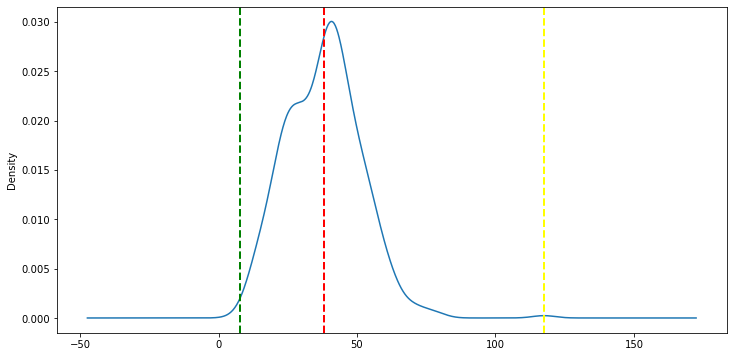

In [41]:
show_density(data['price_per_unit'])

### Now let's observe the distribution of the feature values

In [53]:
# var = type(predictive_features)
# str(var)

"<class 'list'>"

In [54]:
# if str(type(predictive_features)) == "<class 'list'>":
#     print("good idea")
# else:
#     print("encyclopedia idiotica")

good idea


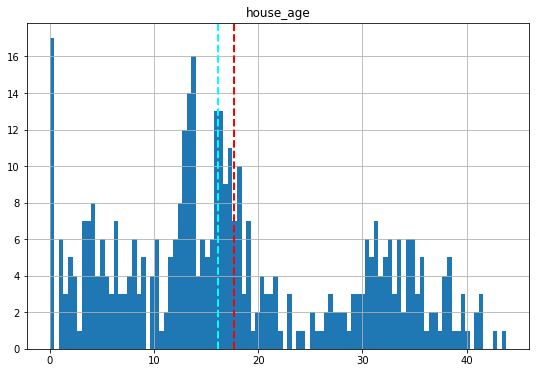

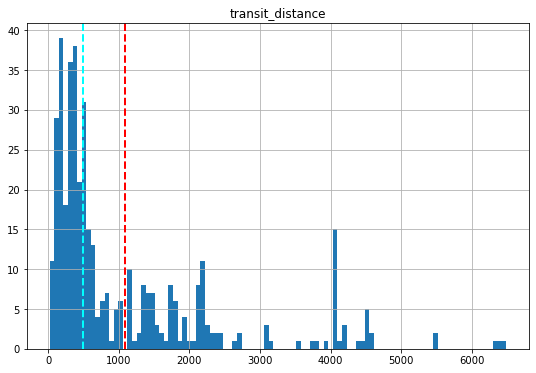

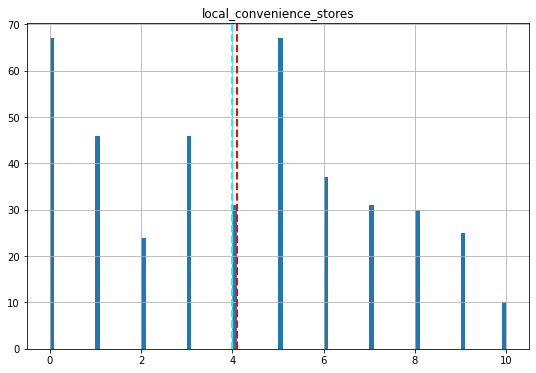

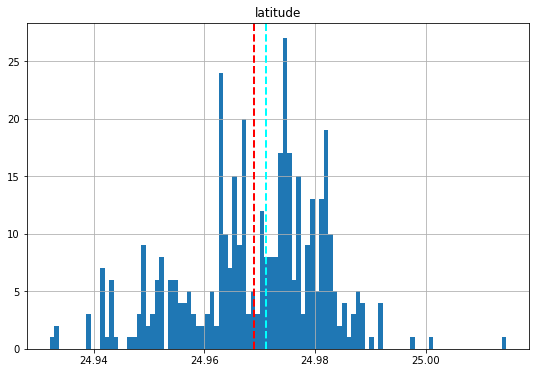

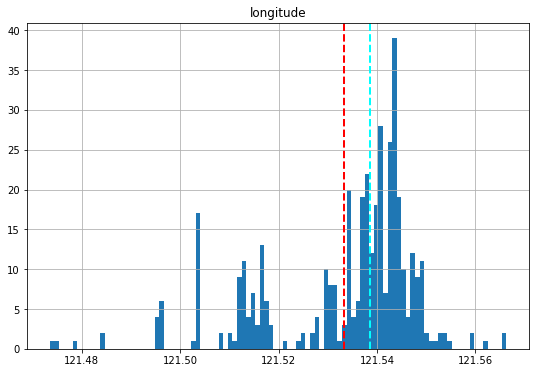

In [58]:
for column_data in predictive_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[column_data]
    feature.hist(bins=100, ax = ax)
#     feature.plot.density()
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(column_data)
plt.show()

### Let's observe the correlation between the label and feature columns

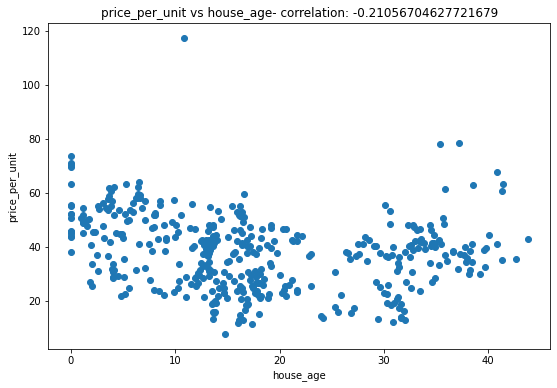

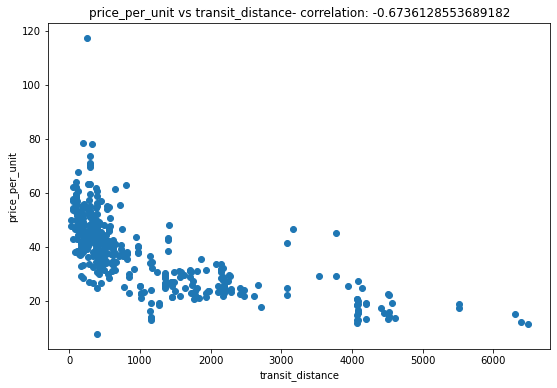

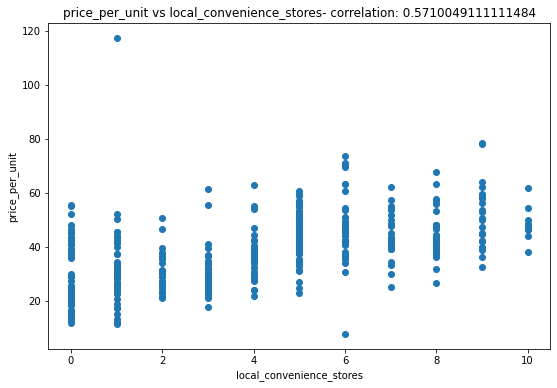

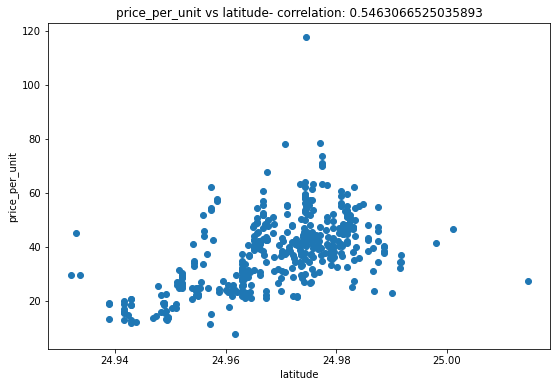

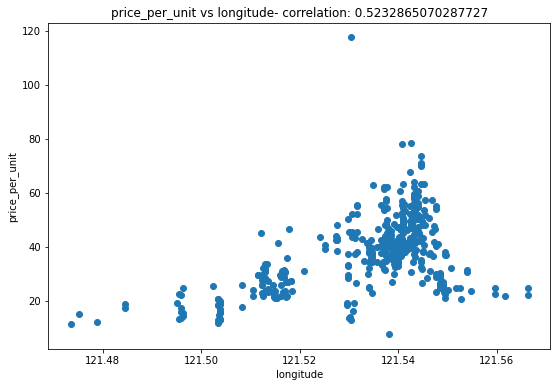

In [112]:
for col in predictive_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    label = data['price_per_unit']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('price_per_unit')
    ax.set_title('price_per_unit vs ' + col + '- correlation: ' + str(correlation))
plt.show()


In [131]:
data.groupby(data.local_convenience_stores).price_per_unit.count()

local_convenience_stores
0     67
1     46
2     24
3     46
4     31
5     67
6     37
7     31
8     30
9     25
10    10
Name: price_per_unit, dtype: int64

### Training the first model 
> *with* LinearRegressor Estimator

In [135]:
predictive_features

['house_age',
 'transit_distance',
 'local_convenience_stores',
 'latitude',
 'longitude']

In [147]:
X, y = data[['house_age', 'transit_distance','local_convenience_stores','latitude','longitude']].values, data['price_per_unit'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[3.2000000e+01 8.4878820e+01 1.0000000e+01 2.4982980e+01 1.2154024e+02]
 [1.9500000e+01 3.0659470e+02 9.0000000e+00 2.4980340e+01 1.2153951e+02]
 [1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01 1.2154391e+02]
 [1.3300000e+01 5.6198450e+02 5.0000000e+00 2.4987460e+01 1.2154391e+02]
 [5.0000000e+00 3.9056840e+02 5.0000000e+00 2.4979370e+01 1.2154245e+02]
 [7.1000000e+00 2.1750300e+03 3.0000000e+00 2.4963050e+01 1.2151254e+02]
 [3.4500000e+01 6.2347310e+02 7.0000000e+00 2.4979330e+01 1.2153642e+02]
 [2.0300000e+01 2.8760250e+02 6.0000000e+00 2.4980420e+01 1.2154228e+02]
 [3.1700000e+01 5.5120380e+03 1.0000000e+00 2.4950950e+01 1.2148458e+02]
 [1.7900000e+01 1.7831800e+03 3.0000000e+00 2.4967310e+01 1.2151486e+02]]

Labels:
[37.9 42.2 47.3 54.8 43.1 32.1 40.3 46.7 18.8 22.1]


In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 289 rows
Test Set: 125 rows


In [151]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train,y_train)
model

LinearRegression()

MSE: 73.60590688991664
RMSE: 8.579388491606883
R2: 0.5681018510026095


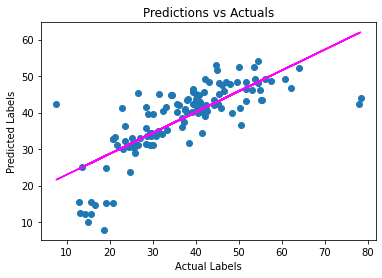

In [153]:
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Training the model
> *with* RandomForestRegressor

In [255]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical columns (imputation, OneHot Encoding)
categorical_features = [1,2]
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                          ('OneHot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features )
    ])

# # Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])

# pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                            ('regressor', GradientBoostingRegressor())])

# pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                           ('model',gridsearch.best_estimator_)])

# pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                           ('model',DecisionTreeRegressor())])

# pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                           ('model',Lasso())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OneHot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [1, 2])])),
     

MSE: 53.18856443370081
RMSE: 7.2930490491769495
R2: 0.6879049046824423


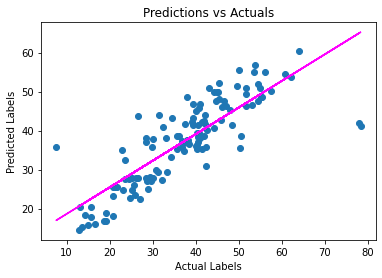

In [256]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

### Hyperparameter Tuning

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(n_estimators=50) 

MSE: 64.76837228432868
RMSE: 8.047879986948654
R2: 0.6199579451549758


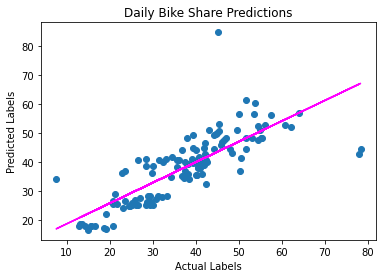

In [207]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150,500]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Best parameter combination: {'n_estimators': 50, 'random_state': 42} 

RandomForestRegressor(n_estimators=50, random_state=42) 

MSE: 53.97211136567465
RMSE: 7.346571402067406
R2 SCORE: 0.5403361794223016


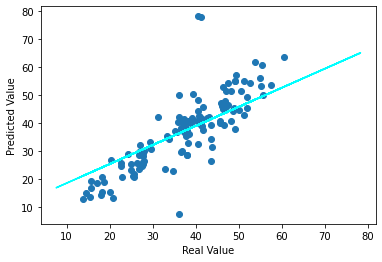

In [267]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score

# Defining the preprocessing for the numeric features
numerical_features = [0,1,3,4]
numerical_transformer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Defining the preprocessing for the categorical features
categorical_features = [2]
categorical_transfromer = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundling the numeric and categoircal transformers into the PREPROCESSOR
preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)])

# HYPERPARAMETER TUNING

# Use a Gradient Boosting algorithm
alg = RandomForestRegressor()

# Try these hyperparameter values
params = {
#  'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [10,50, 100, 150,500],
    'random_state' :[42,32,56,34]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")


# Bundling the preprocessor and the estimator into the pipeline
pipepline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)])

pipeline.fit(X_train,y_train)


predictions = pipeline.predict(X_test)

MSE = mean_squared_error(predictions,y_test)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(predictions,y_test)

print("MSE:",MSE)
print("RMSE:",RMSE)
print("R2 SCORE:",R2_SCORE)

plt.scatter(x=predictions, y=y_test)
plt.xlabel("Real Value")
plt.ylabel("Predicted Value")

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(p)
plt.plot(y_test, p(y_test), color='cyan')
plt.show()

# z = np.polyfit(y_test, predictions, 1)
# p = np.poly1d(z)
# plt.plot(y_test,p(y_test), color='magenta')
# plt.show()

In [268]:
# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,3,4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 3, 4])])),
                ('regressor', RandomForestRegressor())])


MSE: 64.0651748250159
RMSE: 8.004072390040953
R2: 0.6240841042349947


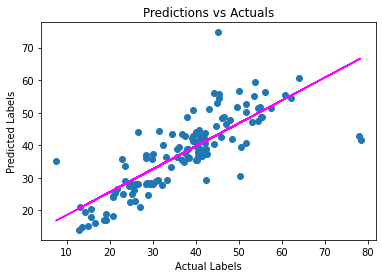

In [269]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [270]:
# Your code to use the trained model

In [273]:
# Saving the model

import joblib

# Save the model as a pickle file
filename = './real_estate_model.pkl'
joblib.dump(model, filename)

# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction (don't include the transaction date)
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

# Use the model to predict unit price
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
50.25
15.95


# Feature engineering idea, converting the latitudes and longitudes to polar coordinates 
#### (not feasible, as polar coordinates also give two values, radius and theta

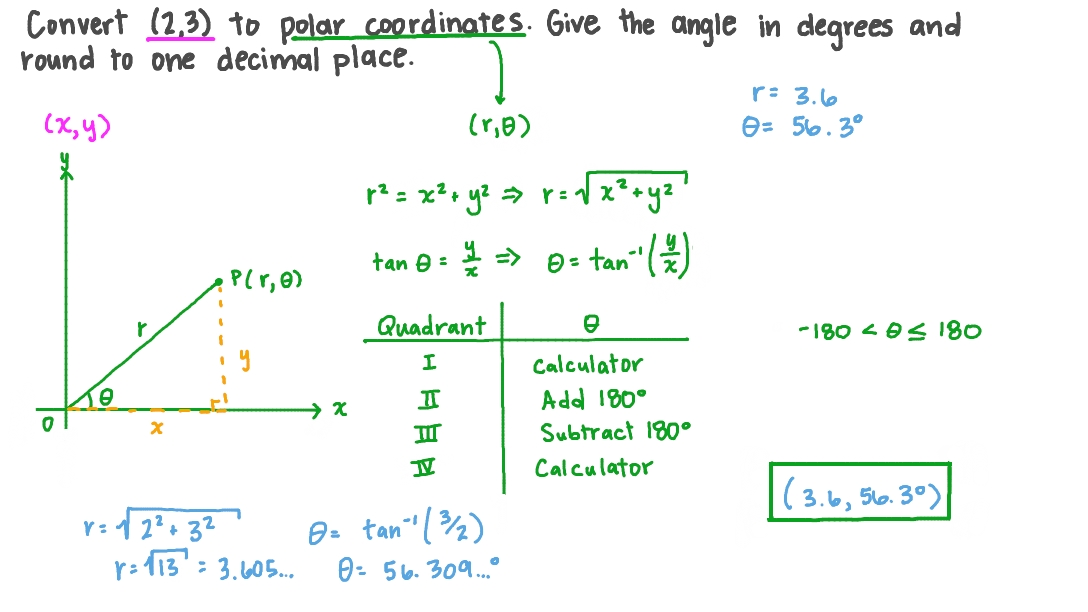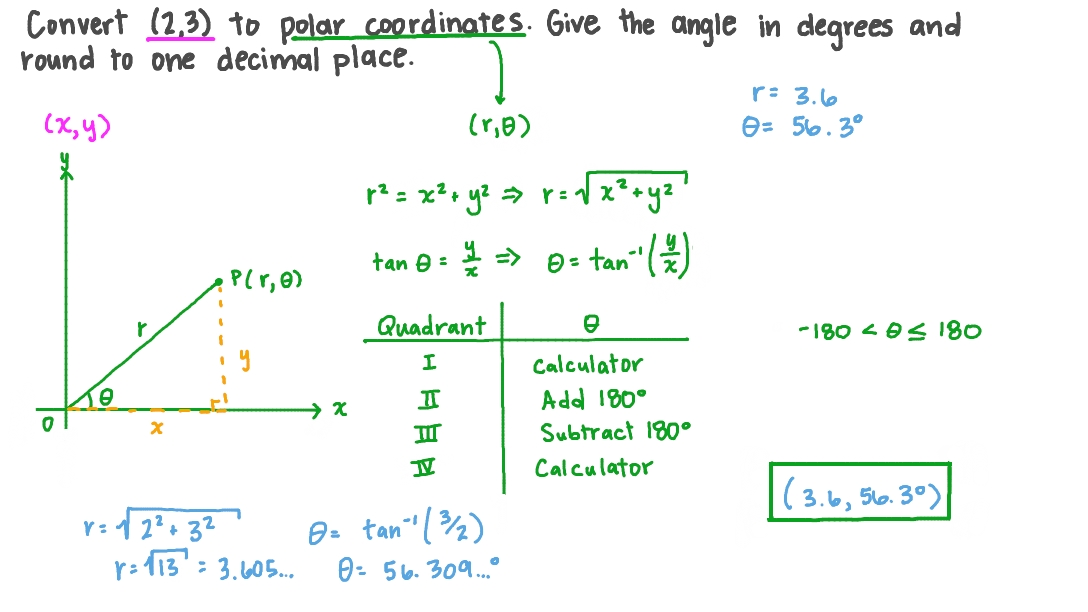